* BASEBALL CASE STUDY

Problem Statement:
    
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an
algorithm that predicts the number of wins for a given team in the 2015 season based on several
different indicators of success. There are 16 different features that will be used as the inputs
to the machine learning and the output will be a value that represents the number of wins. 

* INPUT FEATURES:
        Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,
    Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts,
    Saves,Complete Games and Errors

* OUTPUT: Number of predicted wins (W)

In [14]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [20]:
bb_df=pd.read_csv('D:\Data Trained\baseball.csv')
bb_df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# EXPLORATORY DATA ANALYTICS :

In [21]:
bb_df.shape

(30, 17)

* I have 30 rows and 17 columns in my dataset.

In [22]:
#Checking description of dataset
bb_df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


* I can observe that all the columns have the count value of 
  30 there are no negative values and Few columns have very 
  low values in it and few have very high values in the datset.

In [23]:
# data types of attributes
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


* So,they is a (1)float64 value and (16)int value and there
  are no null values.

In [24]:
#Checking unique values of each columns
bb_df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

* So, I can see these are number of unique values in each 
  column.

In [9]:
# checking for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

* No missing values are present in the given dataset.

In [10]:
# checking categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

[]

* checking for null value

<AxesSubplot:>

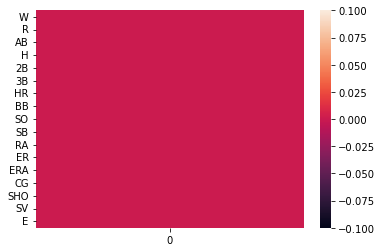

In [11]:
sns.heatmap(df.isnull().sum().to_frame())

In [ ]:
* I can see in graph that there is no null values in the
  given dataset

In [25]:
#Checking value counts of target column
bb_df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

* I can see there are no missing values or spaaces in the target column.

* Visualization Process

Now, let’s visualize the distribution of continuous features

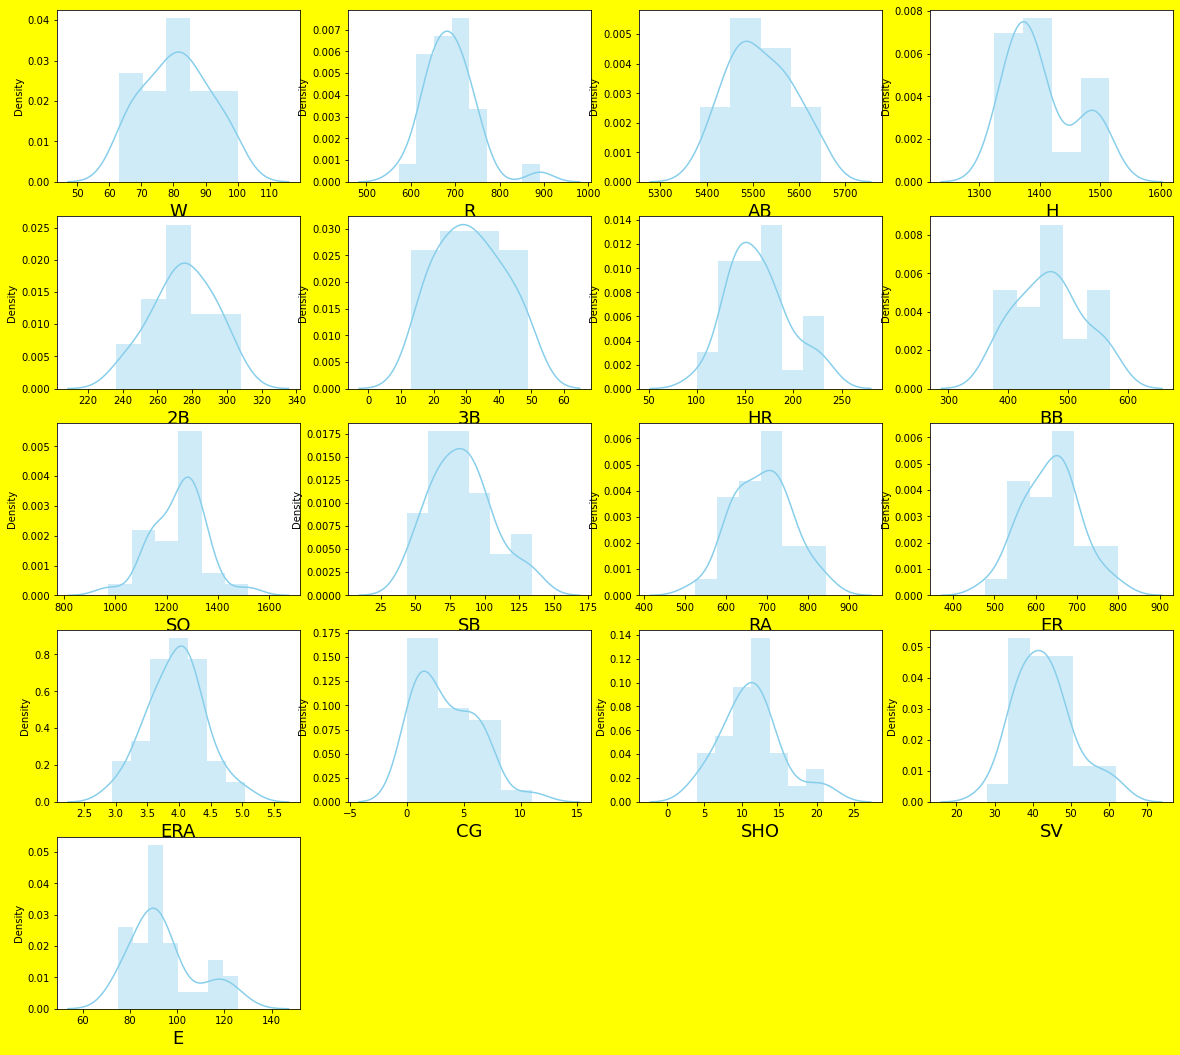

In [32]:
plt.figure(figsize = (20,45), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <=18:
        ax = plt.subplot(12,4,plotnumber)
        sns.distplot(bb_df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.show()

* Almost all the columns are normally distributed.
  Except R,E,SO,CG.

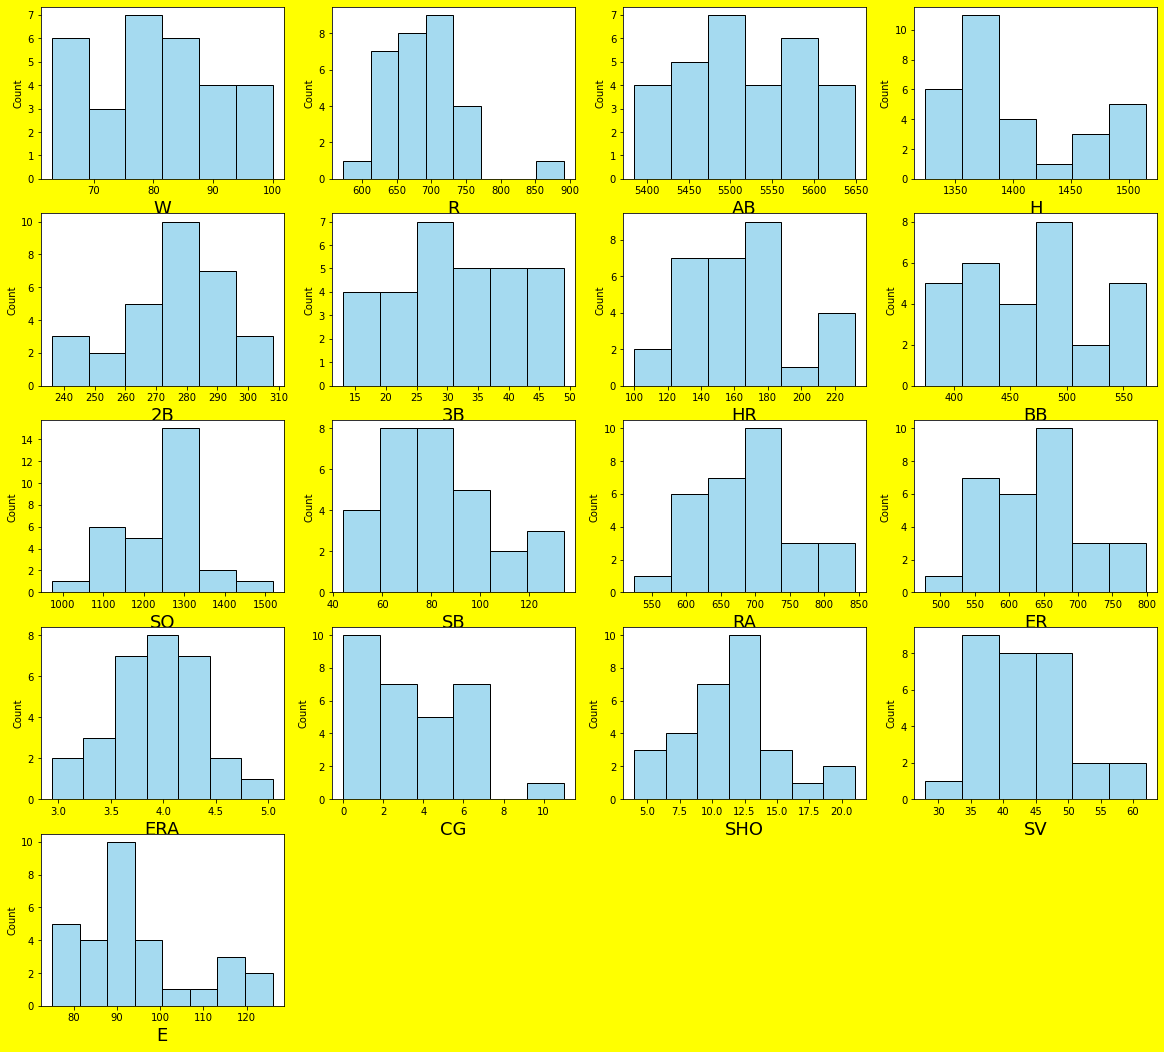

In [31]:
plt.figure(figsize = (20,45), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <=18:
        ax = plt.subplot(12,4,plotnumber)
        sns.histplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber += 1
plt.show()

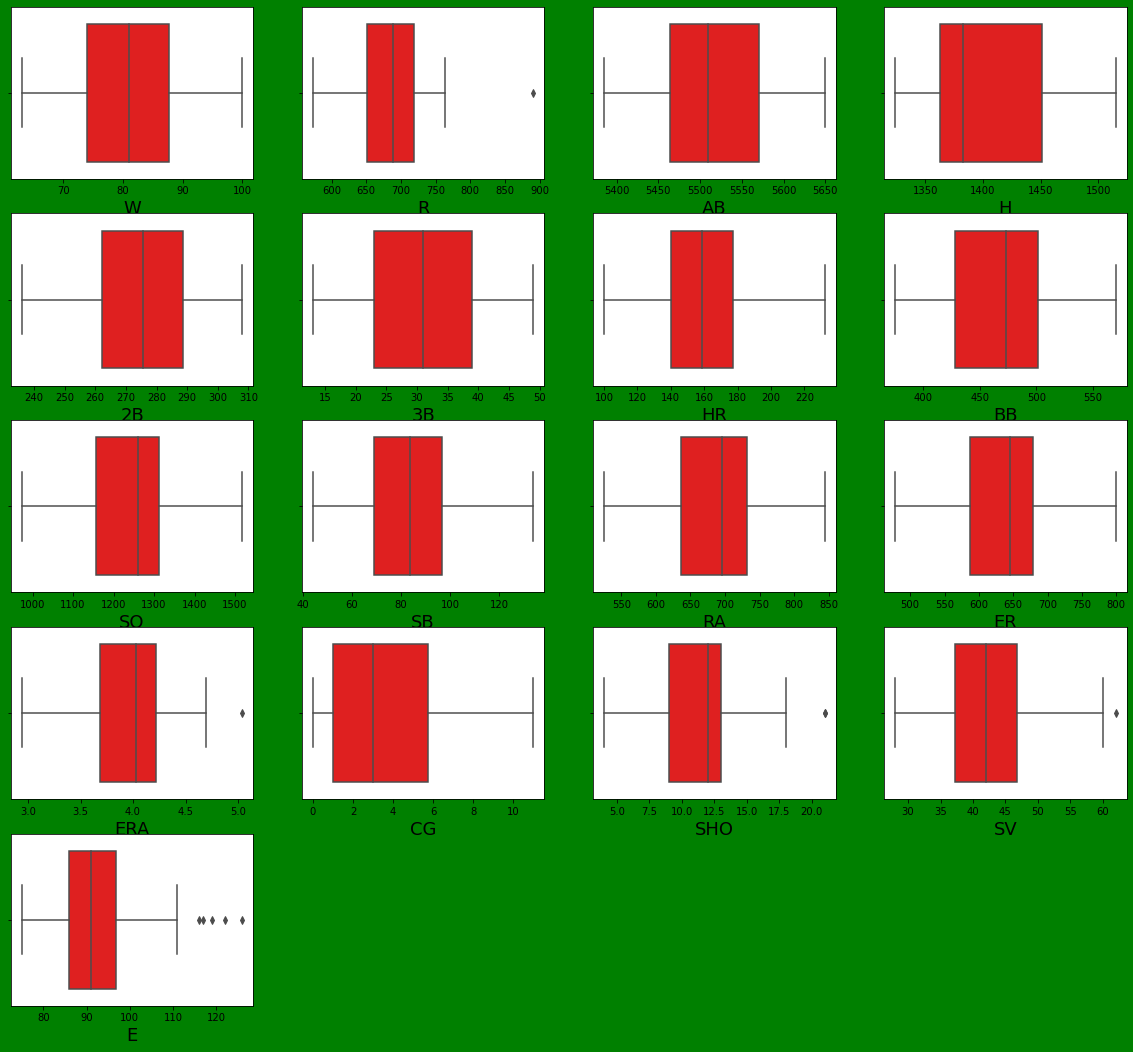

In [33]:
plt.figure(figsize = (20,45), facecolor = 'green')
plotnumber = 1
for column in df:
    if plotnumber <=18:
        ax = plt.subplot(12,4,plotnumber)
        sns.boxplot(df[column], color = 'red')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.show()

* As shown in boxplot ERA,SHO,SV,E and R input variable are having outliers in it.
  So,removing of outliers from that the input variables is necessary

# -----IMPLEMENTING BIVARIATE ANALYSIS----

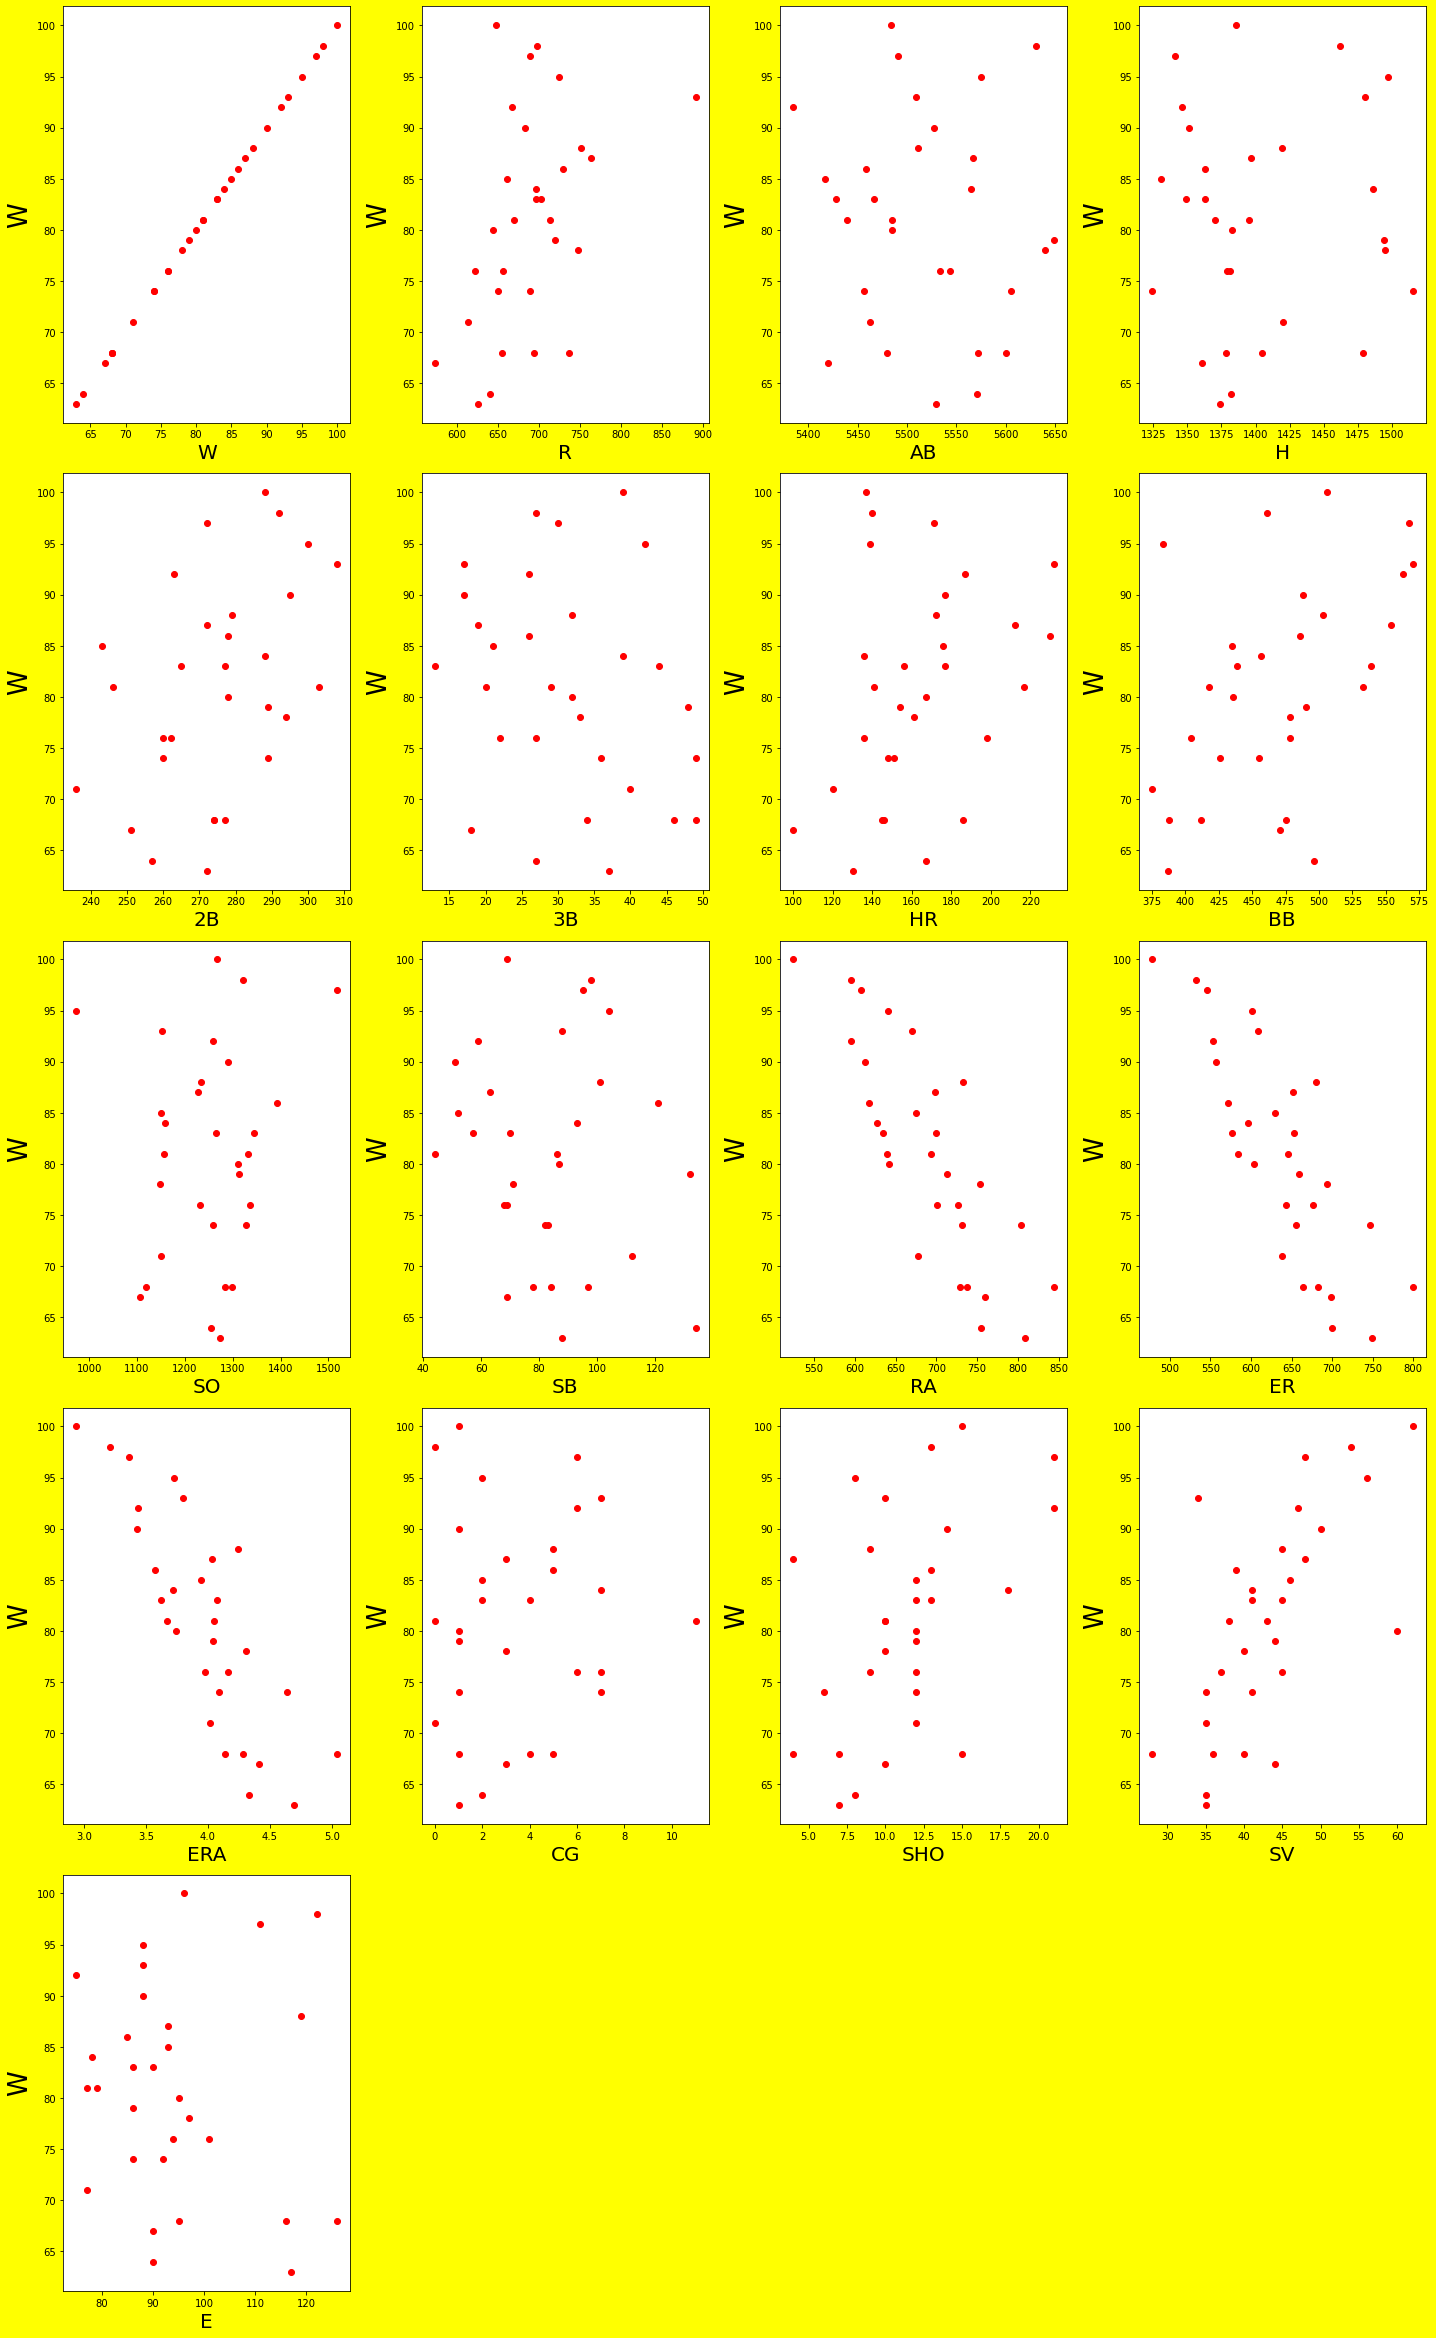

In [39]:
plt.figure(figsize = (20,45), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <=18:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(bb_df[column],bb_df['W'], color='r')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()

* As, we can see in plot R,SV,ERA and SHO are having almost
  linear relationship with target variable and other variables 
  are having non linear relation ship with target variable.

<Figure size 1800x1440 with 0 Axes>

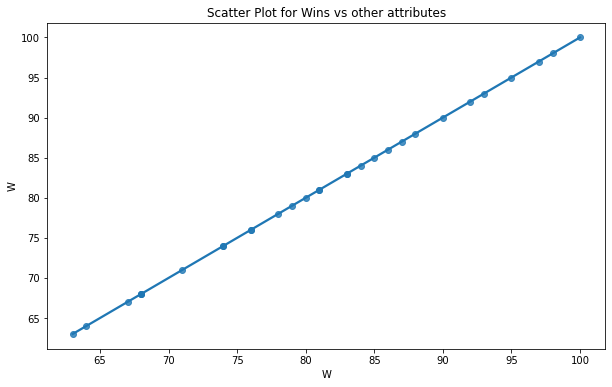

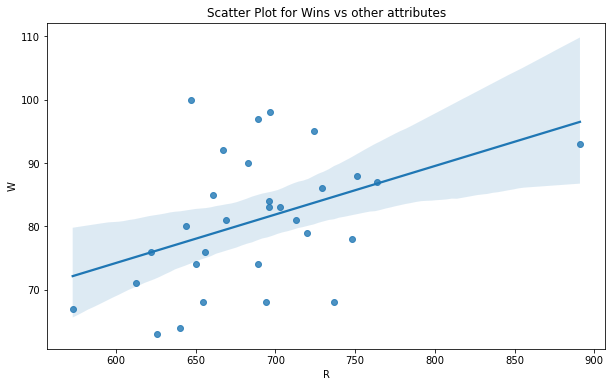

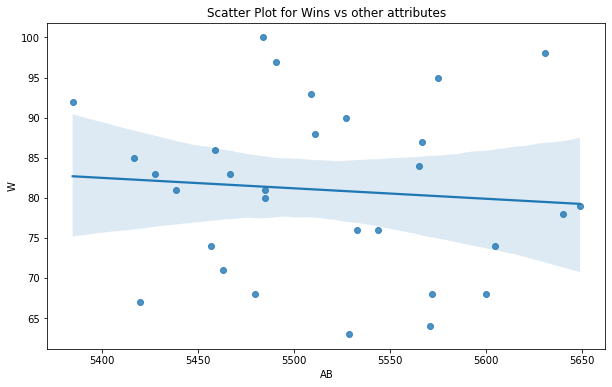

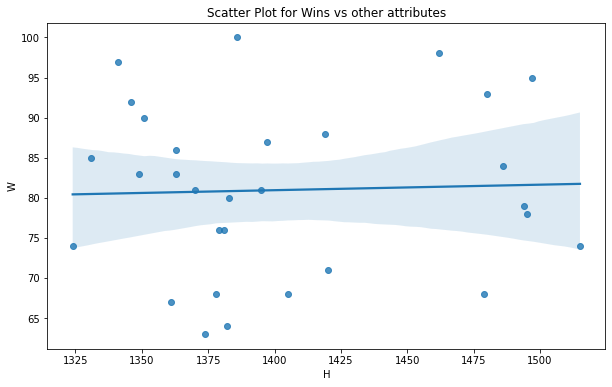

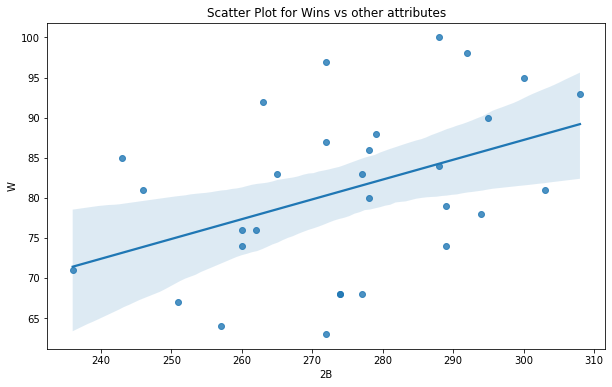

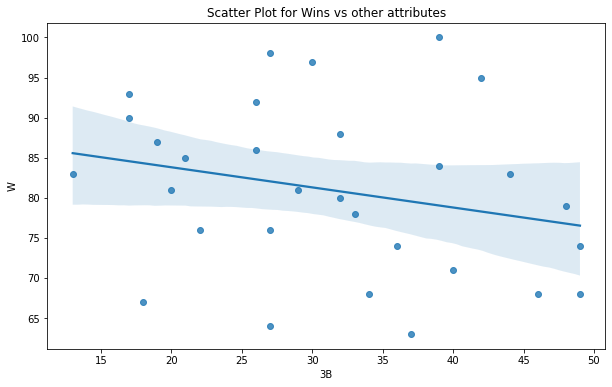

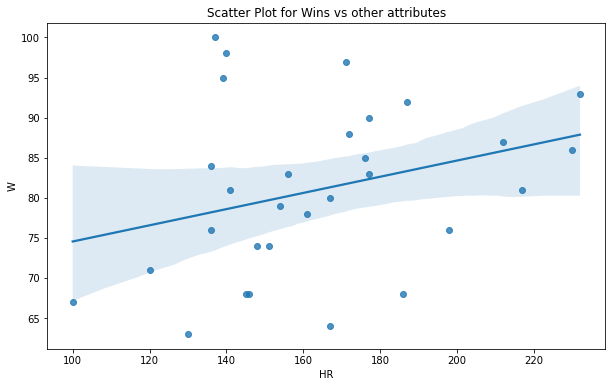

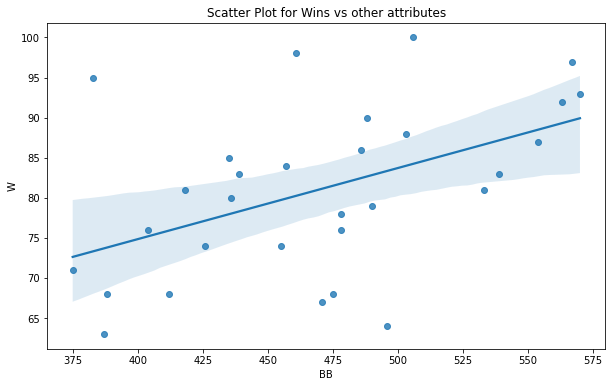

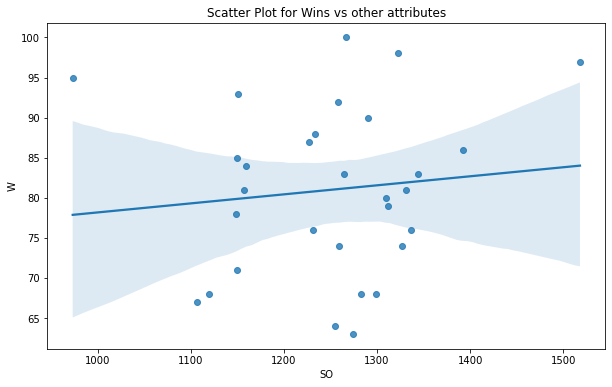

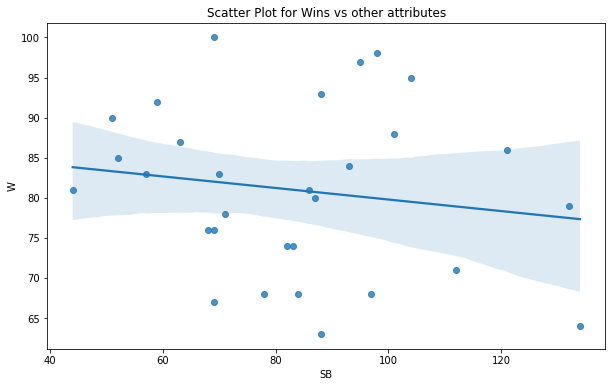

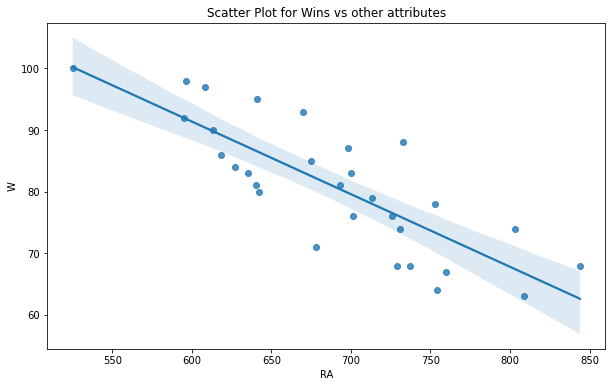

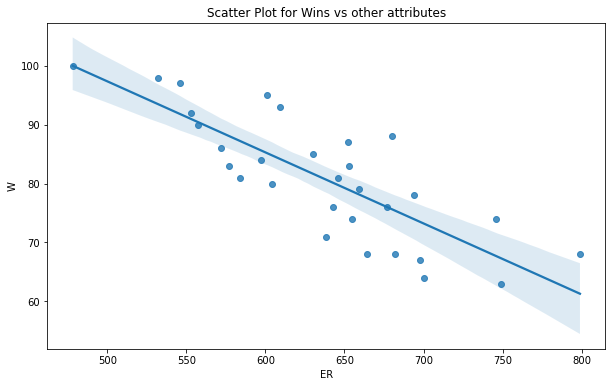

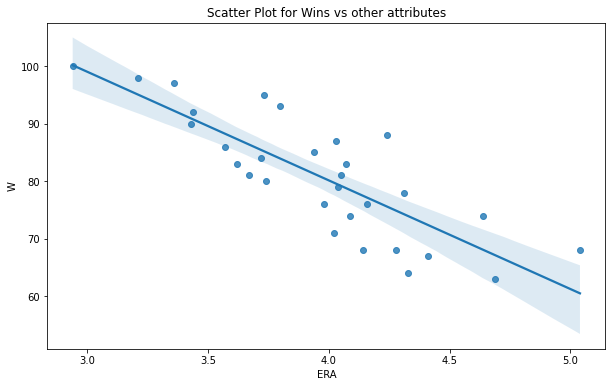

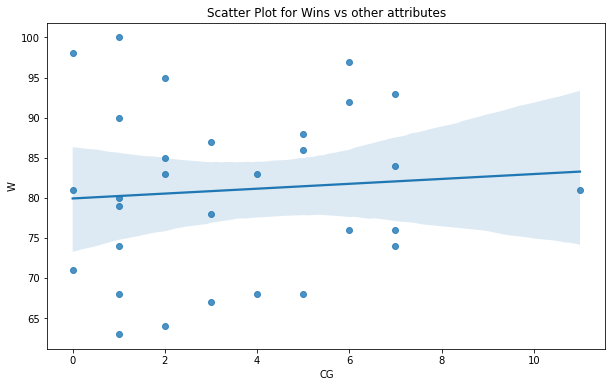

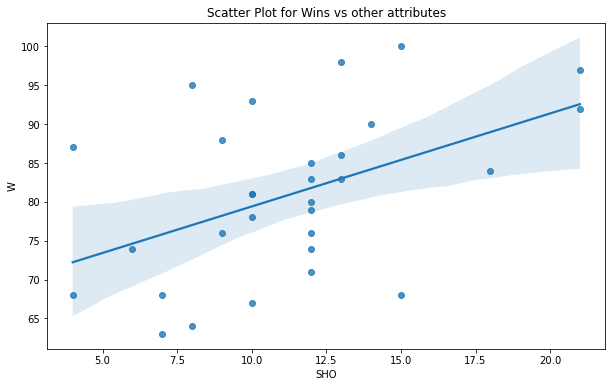

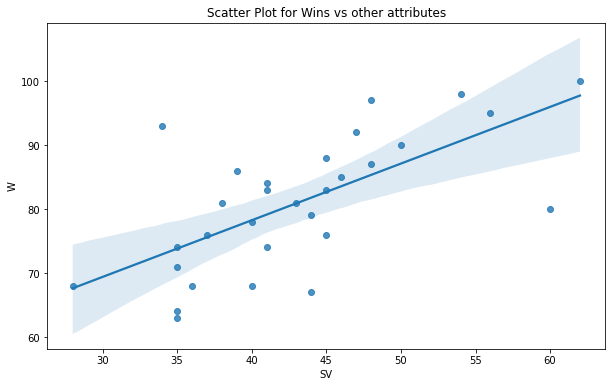

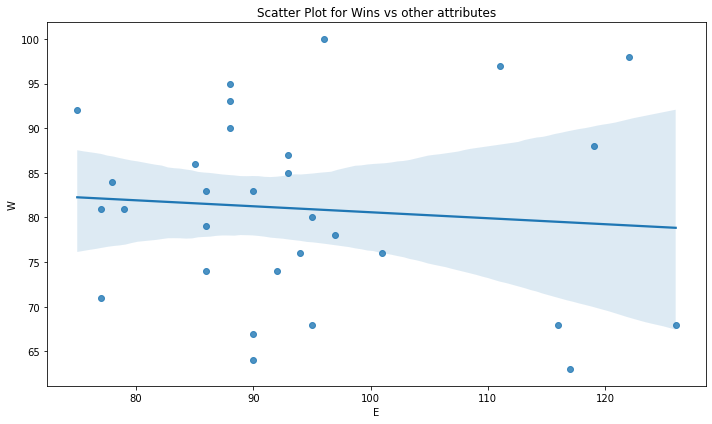

In [41]:
plt.figure(figsize = (25,20), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

* RA,ER,ERA have good relation with Win.
  Reset all the Columns does not good Relation with Win 
  because data is scatterrd across all the places.

# * Preparing Multivariate Analysis:

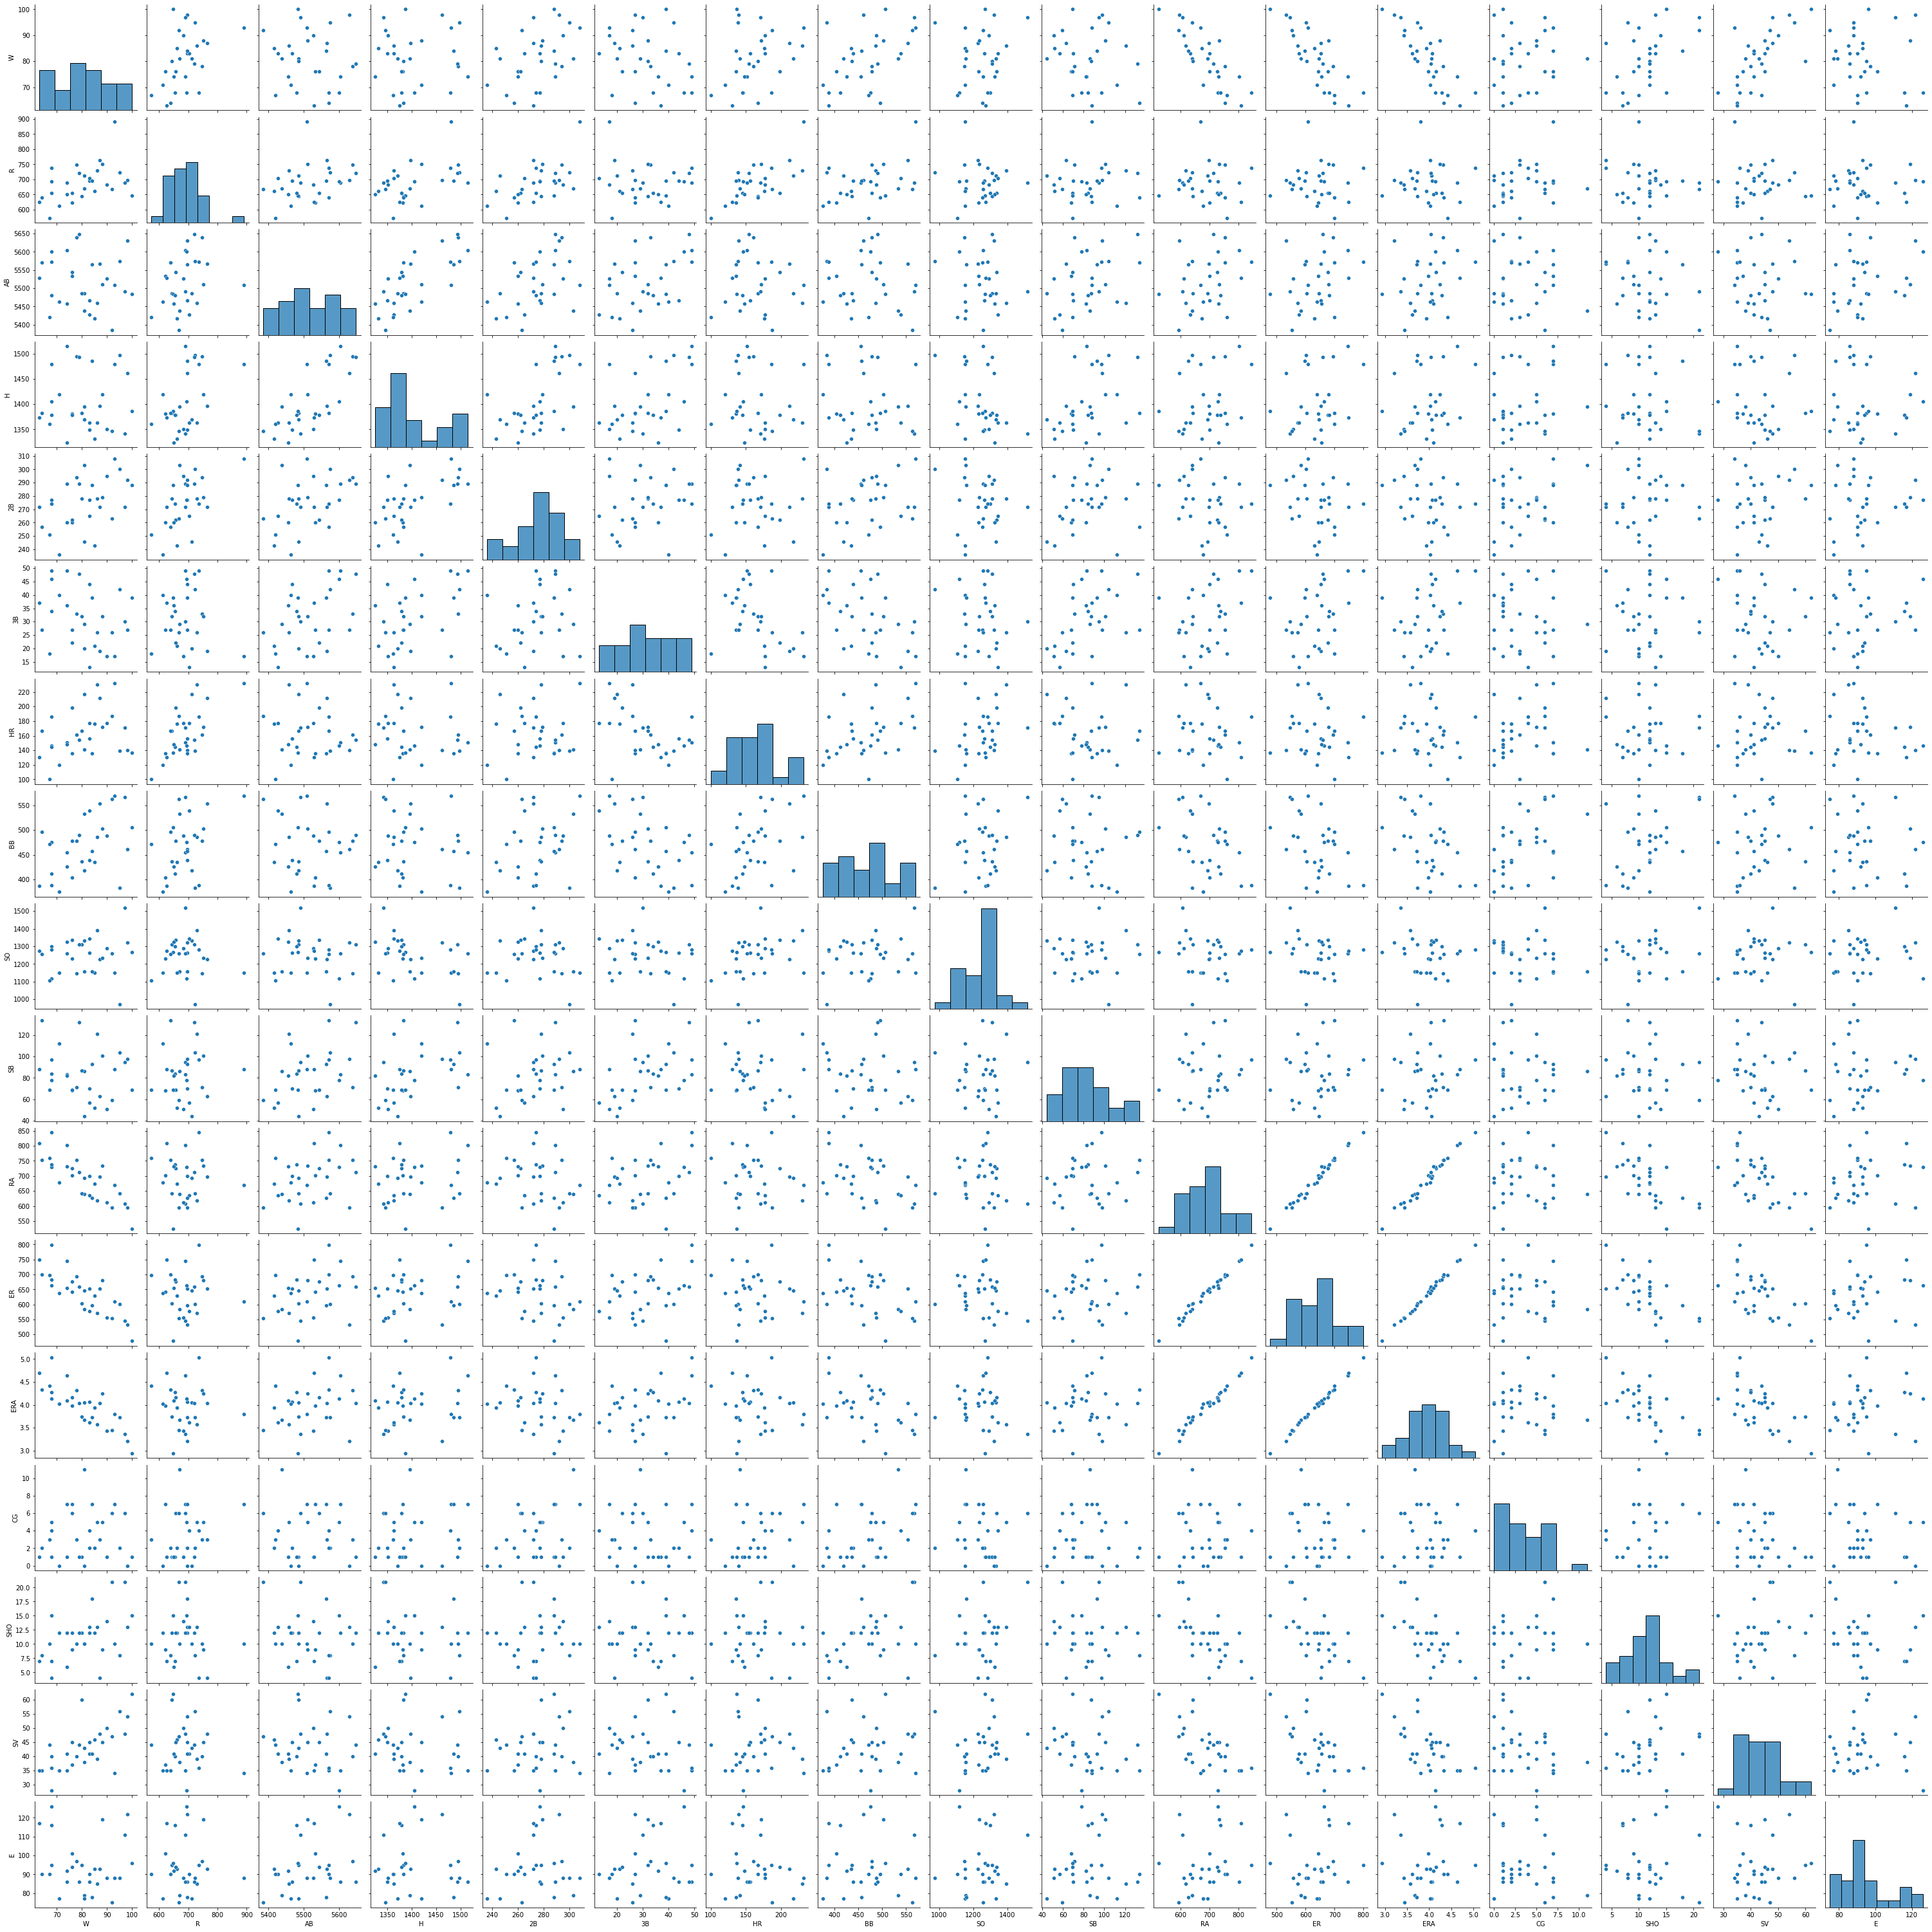

In [42]:
sns.pairplot(bb_df)
plt.show()

* Above the pair plots of each pair of features.
  I can observe whether they are making good correlation 
  or just scattered with out any pattern.

#  CONSIDERING HEATMAP:

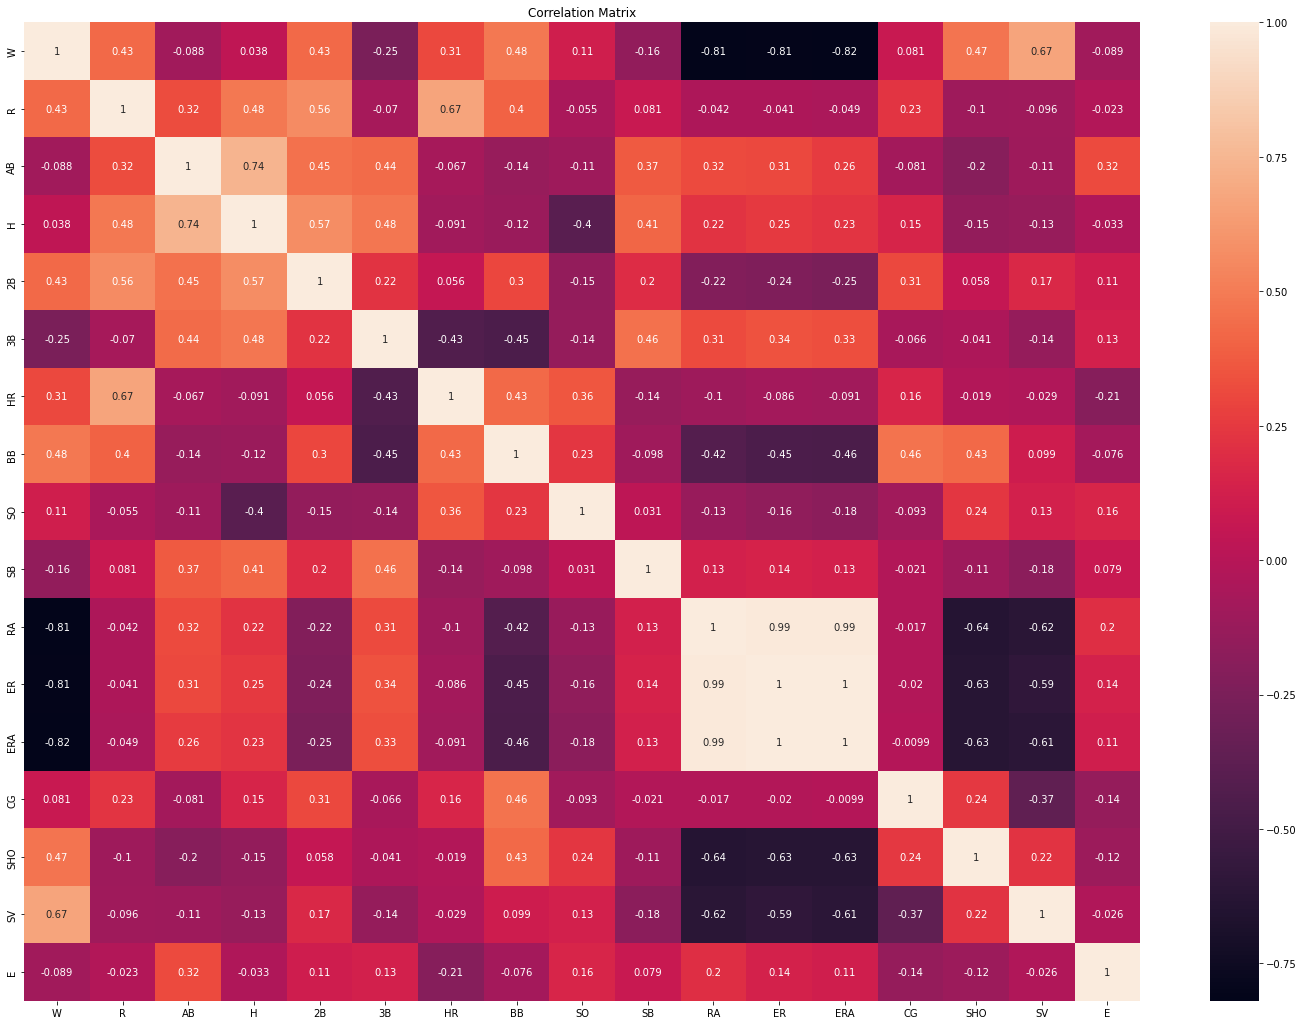

In [43]:
plt.figure(figsize = [25, 18])
sns.heatmap(bb_df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

* Here,it is lightly correlated with each other but RA,ER,ERA columns are highly correlated
  with each other. 
* Also these columns are highly negatively
  correlated with Wins(W) columns.
  

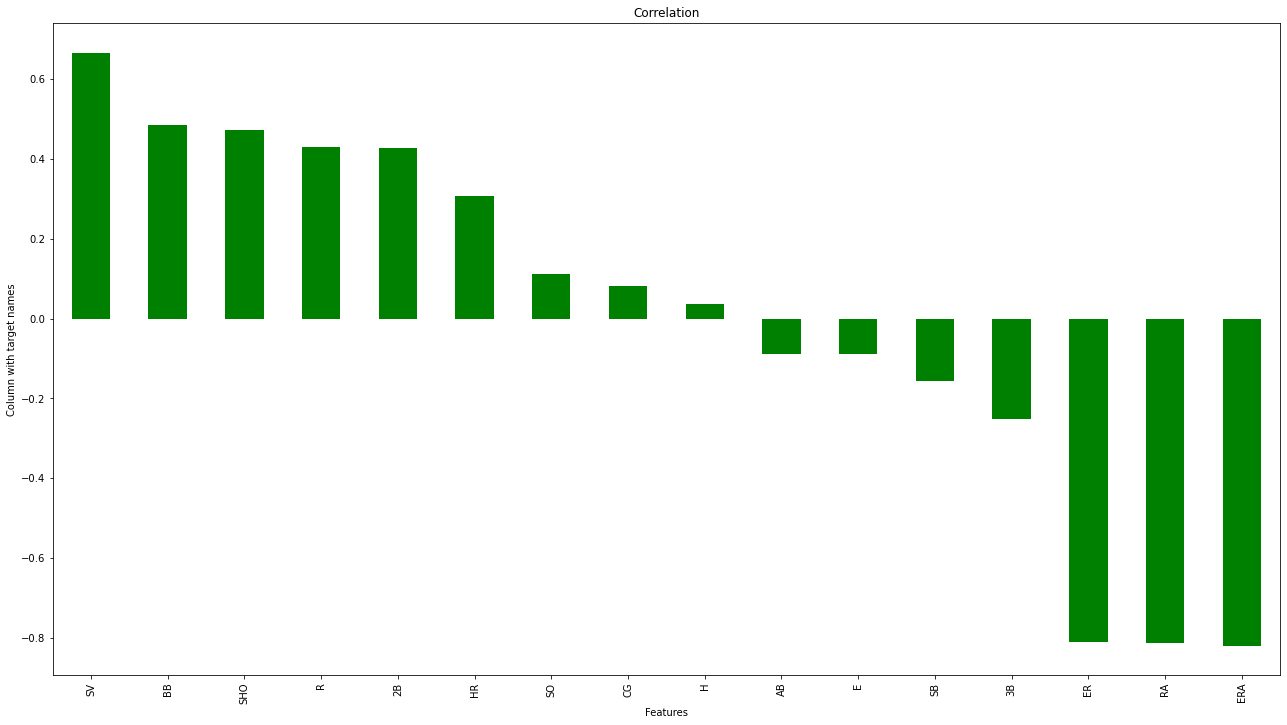

In [44]:
plt.figure(figsize =(22, 12))
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

* We can see from the correlation matrix and the 
  graph,ER,RA,ERA have the strongest correlation with wins
  but in negative nature.

* In positive side SV has the highest correlation of 
  0.67 followed by BB,SHO,R,2B all above 0.4.

* Even though ER,RA and ERA are very negatively correlated
  with wins but they showed highest correlation amongst
  themselves of 0.99.

# Checking for Outliers:

<AxesSubplot:>

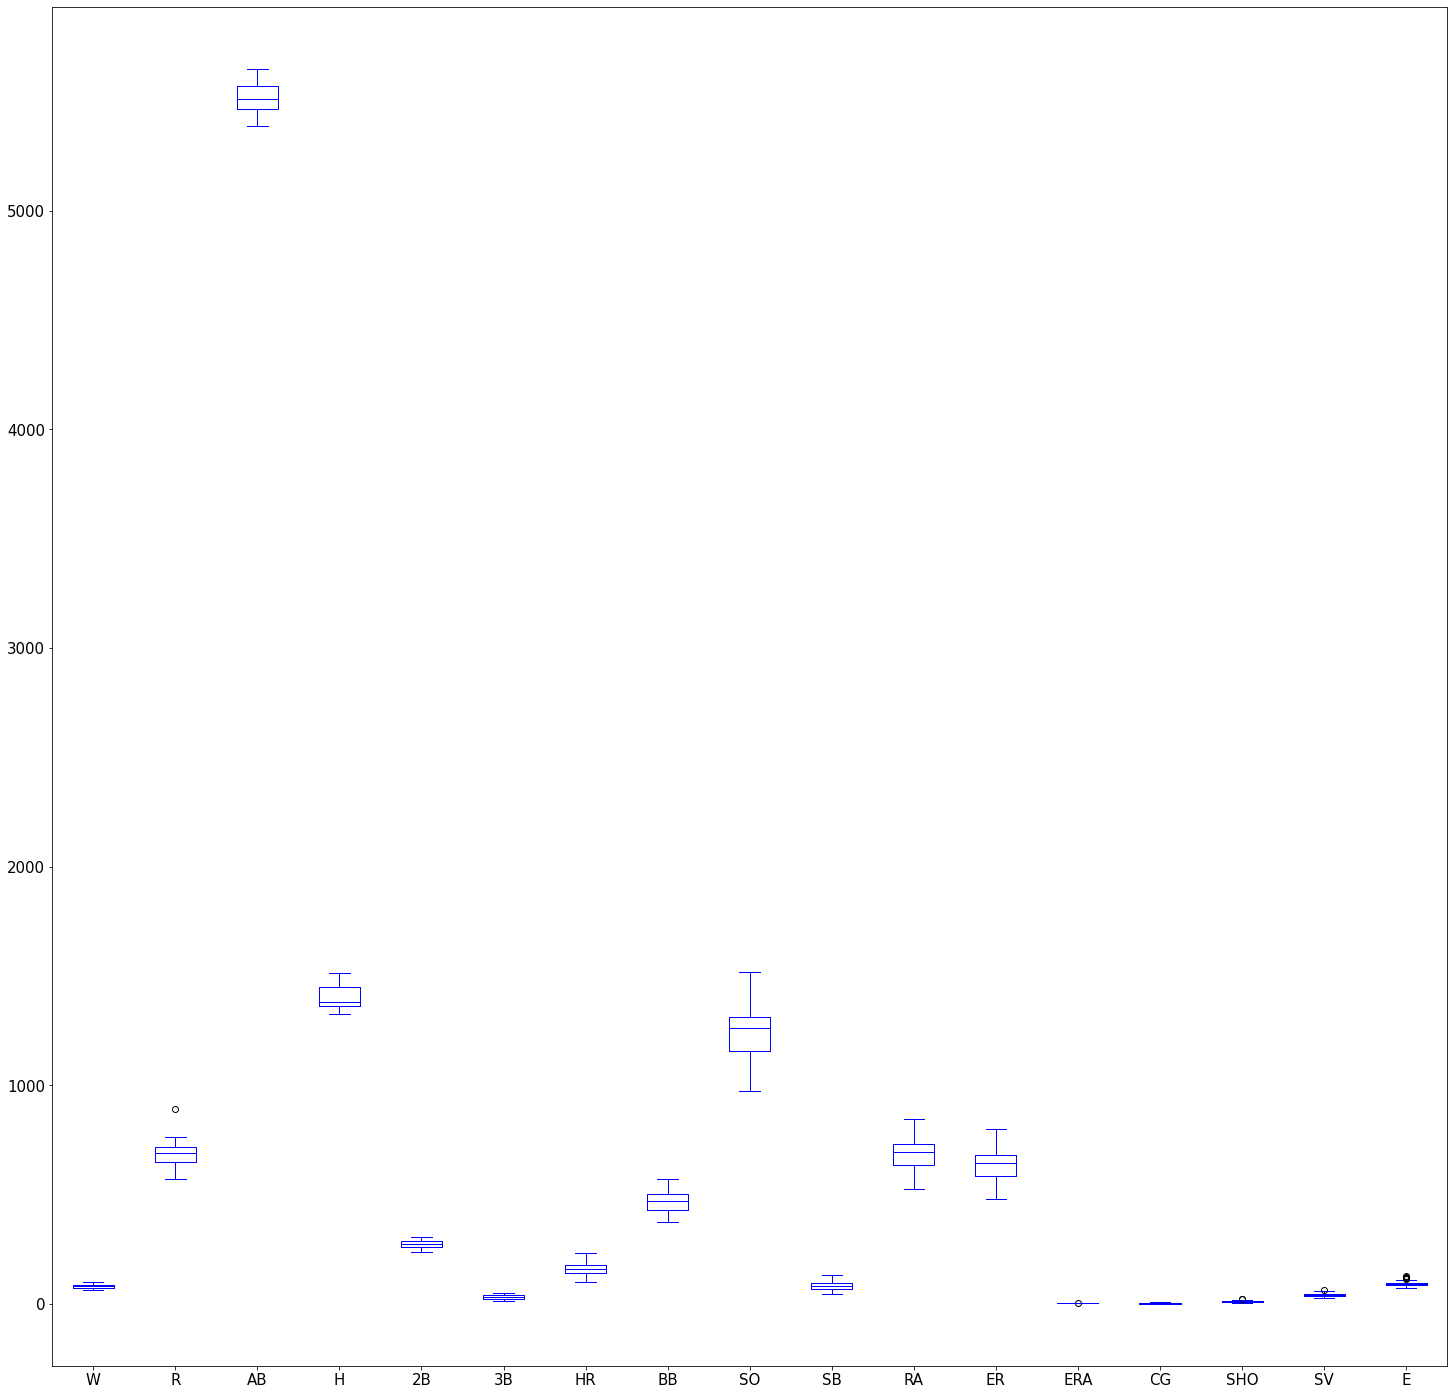

In [45]:
bb_df.plot(kind='box',fontsize=15,figsize=(25,25),color='b')


* By observing the box plot,there are 
  outliers such as R-Runs,SHO-Shutout,ERA-Earned Run average,E-Errors,SV-Saves.
  

# Removing Outliers:
    
Zscore method:

In [46]:
#Features having outliers
features=bb_df[['R','ERA','SHO','SV','E']]

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(features))
bb_df_new=df[(z<3).all(axis=1)]
bb_df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


* So,I have removed outliers by using Zscore method

# Splitting the data for training and testing:

In [51]:
x = bb_df_new.drop("W",axis=1)
y = bb_df_new["W"]

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
 # Find the best random state:

In [52]:
from sklearn.linear_model import  LinearRegression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9813110675354016
At random state0, The test accuracy is :-0.3212676880537437


At random state1, The training accuracy is :-0.9726903849968487
At random state1, The test accuracy is :-0.5526200953434608


At random state2, The training accuracy is :-0.9654739620173654
At random state2, The test accuracy is :--0.1833478760053049


At random state3, The training accuracy is :-0.9707815498962509
At random state3, The test accuracy is :-0.59059376866802


At random state4, The training accuracy is :-0.9638069051194144
At random state4, The test accuracy is :-0.7760427205275862


At random state5, The training accuracy is :-0.9617987069171365
At random state5, The test accuracy is :-0.5561762468531394


At random state6, The training accuracy is :-0.9759979960717315
At random state6, The test accuracy is :-0.7546871785943479


At random state7, The training accuracy is :-0.9603166700336763
At random state7, The test accuracy is :-0.410957875119

In [53]:
#Splitting the data into 78% training and 22% testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [54]:
x_train.shape

(22, 16)

In [55]:
y_train.shape

(22,)

In [56]:
x_test.shape

(7, 16)

In [57]:
y_test.shape

(7,)

# MODEL BUILDING:
    
Regression Algorithms:

In [67]:
#Importing necessary libraries
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

# 1)Linear Regression:

In [59]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9606451190270191


In [60]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 20.707107792449296
MAE: 3.951366151649308
r2_score: 0.881337539915595


* LR is giving me 88% r2_score

# 2)SGD REGRESSOR :

In [63]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mae:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -4.6463668042173254e+26
mae: 6.3038870437626096e+28
mae: 228781766279658.1
rmse: 251075427785408.94


* SGD is giving me 90% r2_score.

# 3)Ridge Regressor:

In [68]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [69]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mse:',metrics.mean_squared_error(y_test,pred))
print('mae:',metrics.mean_absolute_error(y_test,pred))
print('rmse:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8041401634902685
mse: 26.57298353299379
mae: 4.446645173370212
rmse: 5.154898983781718


* Ridge is giving 76%r2_score

# Cross Validation:

In [70]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),]

names = ['LR','R','svr','svr_p','svr_r',]

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 35.708969, 32.760331
R   : 36.422899, 39.469521
svr   : 84.389660, 51.778557
svr_p   : 111.779292, 79.772741
svr_r   : 112.270348, 79.779631


* According to all metrics score selecting the linearRegression as final mode

# PREDICTIONS :

In [ ]:
CONCLUSIONS
1. Made EDA process, which gave me good results.
2. I have made all graph analysis like Univariate Analysis, Bivariate Analysis and Multivariate Analysis.
3. I have conducted a Heat Map, which gave slightly good results.
4. Made an Analysis on Out liers and removed the out liers by using Zscore method.
5. Splitting the data for training and testing results are also made.
6. I used various Machine Learning models like LinearRegression,SGD Regressor, and Ridge Regression and 
   attmpted a cross-validation process to find  the best metrics.
7.   Finally , i got 80% of valid data with my data analysis.